In [54]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 

In [55]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
df_train = df_train.drop(['Ticket','Name','PassengerId','Cabin'],axis=1).dropna()
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [57]:
X_titanic_full = df_train.iloc[:,1:].values
Y_titanic_full = df_train.iloc[:,0].values

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_titanic_full, Y_titanic_full, test_size=0.20)

In [63]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X_train_onehot = enc.fit_transform(X_train)
X_test_onehot = enc.fit_transform(X_test)
X_titanic_full_onehot = enc.fit_transform(X_titanic_full)

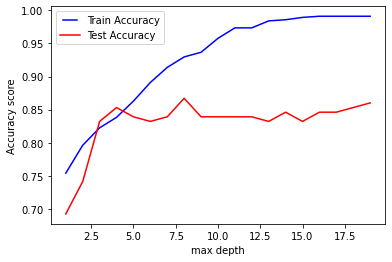

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

acc_train = [] 
acc_test = []
depth_interval = range(1,20)
for i in depth_interval:
    clf = RandomForestClassifier(n_estimators=100,max_depth=i)
    clf.fit(X_train_onehot, Y_train)
    Y_predicted = clf.predict(X_test_onehot)
    Y_predicted_train = clf.predict(X_train_onehot)
    acc_test.append(accuracy_score(Y_test, Y_predicted))
    acc_train.append(accuracy_score(Y_train, Y_predicted_train))

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(depth_interval, acc_train, 'b', label='Train Accuracy')
line2, = plt.plot(depth_interval, acc_test, 'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('max depth')
plt.show()

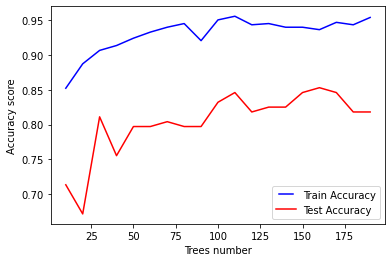

In [61]:
acc_train = [] 
acc_test = []
trees_interval = range(10,200,10)
for i in depth_interval:
    clf = RandomForestClassifier(n_estimators=i,max_depth=10)
    clf.fit(X_train_onehot, Y_train)
    Y_predicted = clf.predict(X_test_onehot)
    Y_predicted_train = clf.predict(X_train_onehot)
    acc_test.append(accuracy_score(Y_test, Y_predicted))
    acc_train.append(accuracy_score(Y_train, Y_predicted_train))

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(trees_interval, acc_train, 'b', label='Train Accuracy')
line2, = plt.plot(trees_interval, acc_test, 'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Trees number')
plt.show()

In [62]:
clf = RandomForestClassifier(n_estimators=100,max_depth=10,criterion='gini')
clf.fit(X_train_onehot, Y_train)
Y_predicted = clf.predict(X_test_onehot)
Y_predicted_train = clf.predict(X_train_onehot)
print(classification_report(Y_test, Y_predicted))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87        78
           1       0.88      0.78      0.83        65

    accuracy                           0.85       143
   macro avg       0.86      0.85      0.85       143
weighted avg       0.86      0.85      0.85       143



In [53]:
clf = RandomForestClassifier(n_estimators=100,max_depth=10,criterion='entropy')
clf.fit(X_train_onehot, Y_train)
Y_predicted = clf.predict(X_test_onehot)
Y_predicted_train = clf.predict(X_train_onehot)
print(classification_report(Y_test, Y_predicted))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        84
           1       0.73      0.73      0.73        59

    accuracy                           0.78       143
   macro avg       0.77      0.77      0.77       143
weighted avg       0.78      0.78      0.78       143



**Parametes choosen are:** 
* Max depth = 10
* Number of estimators = 100
* Criterion = Gini

In [88]:
clf = RandomForestClassifier(n_estimators=100,max_depth=3,criterion='gini')
clf.fit(X_titanic_full_onehot, Y_titanic_full)

df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
df_test = df_test.drop(['Ticket','Name','Cabin'],axis=1)
df_test = df_test.fillna(method='ffill')

df_submission = df_test[['PassengerId']]

df_test = df_test.drop(['PassengerId'],axis=1)

X_titanic_full_test = np.array(df_test.values)
X_titanic_full_test_ordinal = enc.fit_transform(X_titanic_full_test)

Y_titanic_full_test = clf.predict(X_titanic_full_test_ordinal)

df_submission['Survived'] = pd.Series(Y_titanic_full_test)
df_submission.to_csv('titanic_submission.csv',index=False)